In [278]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from formulaic import Formula

In [279]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna() #me saca todos los valores nulos, como? los elimina

In [280]:
train_ind = np.full(len(penguins), False)
train_ind[0:int(0.8*len(penguins))] = True
np.random.shuffle(train_ind)
penguins_train = penguins[train_ind == True]
penguins_test = penguins[train_ind == False] # este codigo es la manera manual de lo de abajo

In [281]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.2, random_state=42)

In [282]:
X = pd.DataFrame(penguins["flipper_length_mm"])
y = pd.DataFrame(penguins["body_mass_g"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [283]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train, y_train)   # Realiza

# Predicciones
y_pred = modelo.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.7938115564401114
Raiz cuadarada del ECM:  360.398001833317


In [284]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train**2, y_train)   # Realiza

y_pred = modelo.predict(X_test**2)

r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.798016088079326
Raiz cuadarada del ECM:  356.70451284964815


In [285]:
modelo = linear_model.LinearRegression() 
modelo.fit(X_train**3, y_train) 

y_pred = modelo.predict(X_test**3)

r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.8001297307720785
Raiz cuadarada del ECM:  354.8332532334887


In [286]:
y_pred = sorted(modelo.predict(X).flatten())

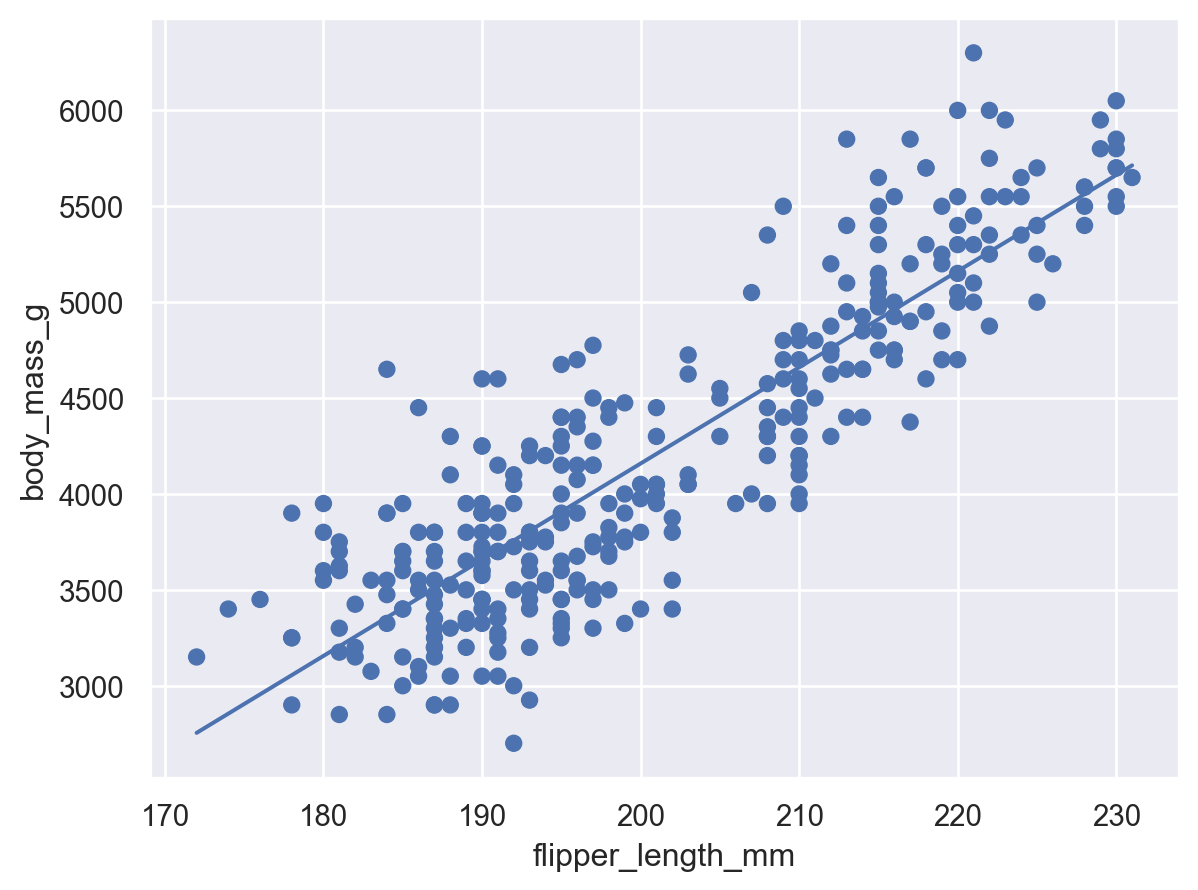

In [287]:
(
    so.Plot(data = penguins, x = "flipper_length_mm", y = "body_mass_g")
    .add(so.Line(), so.PolyFit(1))  # Otro milagro!! No le tenía ninguna fe a esto :)
    .add(so.Dot())
)

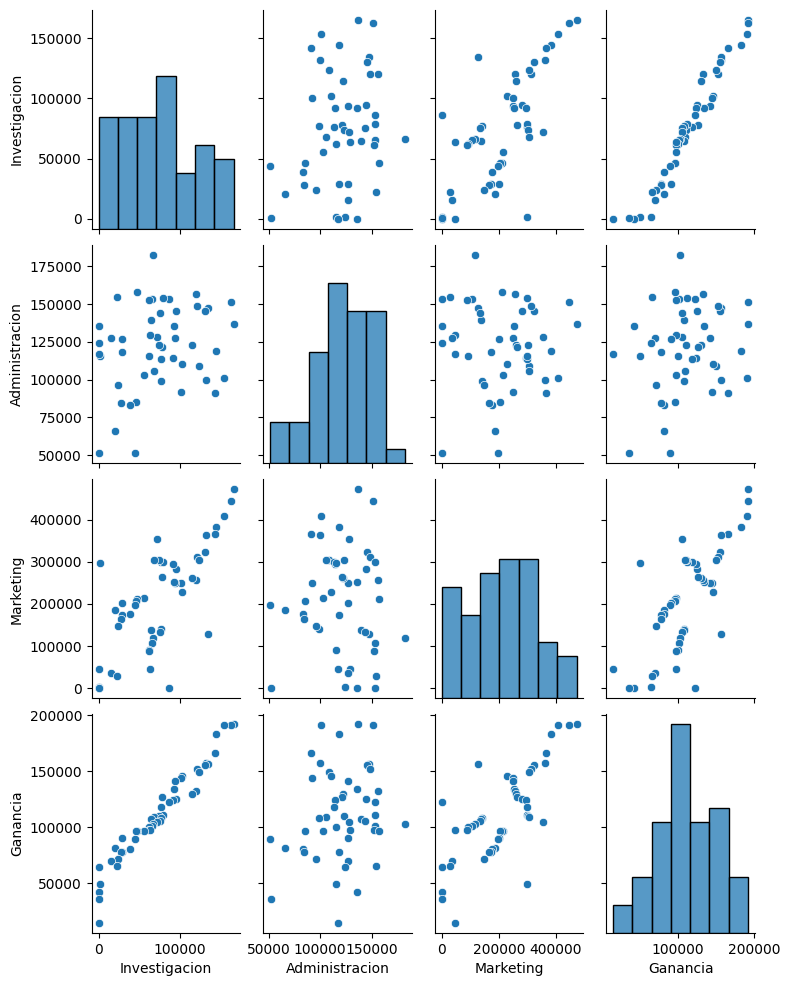

In [288]:
stups = pd.read_csv("50_Startups.csv")
sns.pairplot(data=stups, aspect=0.8)

In [289]:
y, X = Formula("Ganancia ~ Investigacion").get_model_matrix(stups)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9465353160804392
Raiz cuadarada del ECM:  9226.100548285232


In [290]:
y, X = Formula("Ganancia ~ Administracion").get_model_matrix(stups)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.04028714077757245
Raiz cuadarada del ECM:  39089.07005473707


In [291]:
y, X = Formula("Ganancia ~ Marketing").get_model_matrix(stups)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.5591535746115515
Raiz cuadarada del ECM:  26492.82942981263


In [292]:
y, X = Formula("body_mass_g ~ flipper_length_mm + sex").get_model_matrix(penguins)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X).flatten()

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))
display("La diferencia de peso entre macho y hembra es de " + str(round(modelo.coef_.flatten()[2])) + " gramos") 


R^2:  0.8058374128212915
Raiz cuadarada del ECM:  354.2762094481607


'La diferencia de peso entre macho y hembra es de 348 gramos'

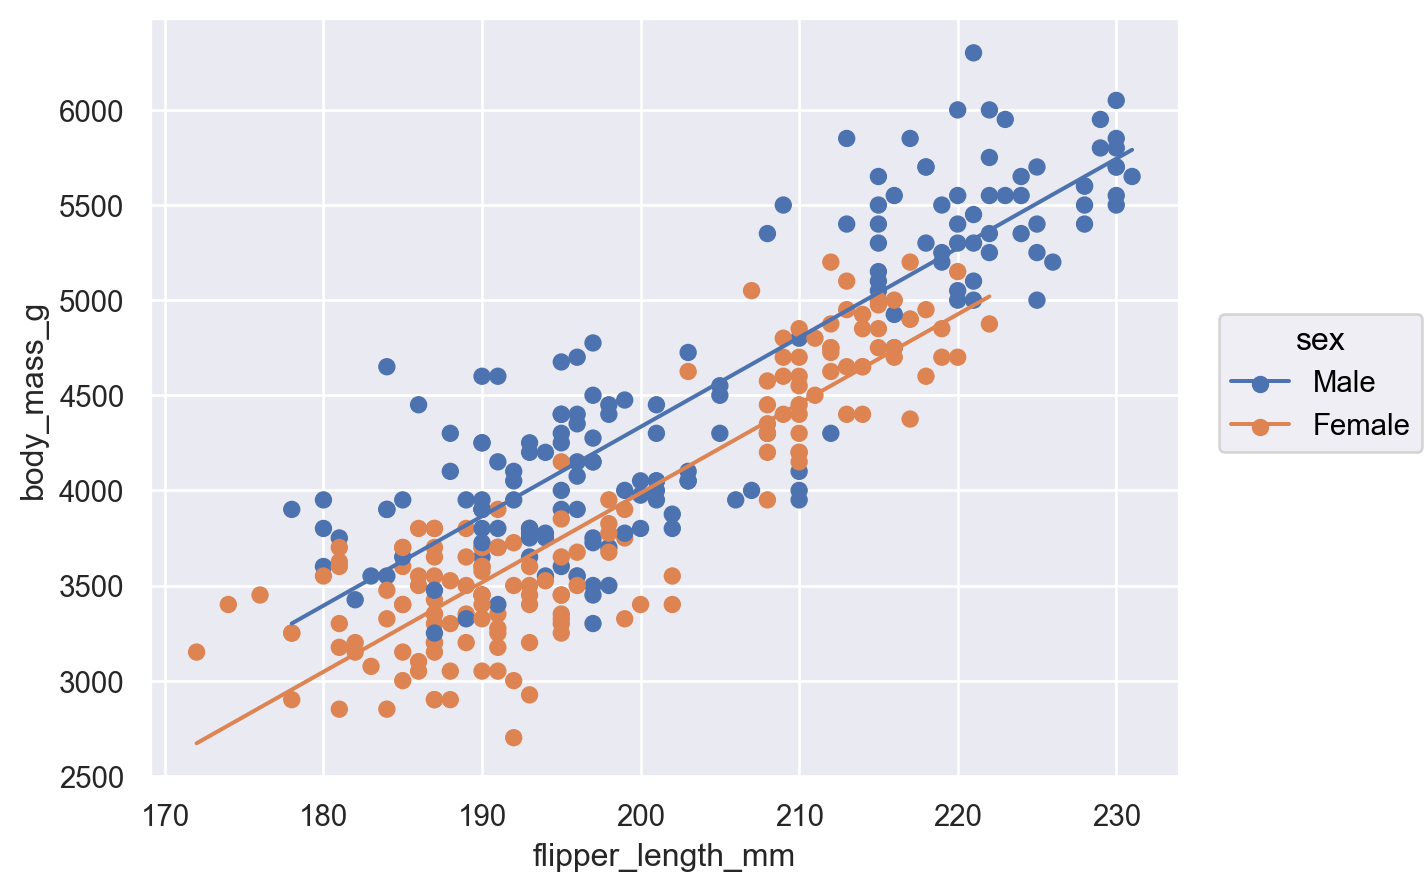

In [293]:
(
    so.Plot(data = penguins, x = "flipper_length_mm", y = "body_mass_g", color = "sex")
    .add(so.Line(), y=y_pred, color = "sex")  # Otro milagro!! No le tenía ninguna fe a esto :)
    .add(so.Dot())
)

In [294]:
encoderOrd = OrdinalEncoder()
sex01 = encoderOrd.fit_transform(penguins[["sex"]])
penguins["sex01"] = sex01 #Con formulaic esto sale automatico usando sex como variable

In [295]:
encoderOHE = OneHotEncoder(sparse_output = False)
species3 = encoderOHE.fit_transform(penguins[["species"]])
species3_df = pd.DataFrame(species3, columns=encoderOHE.get_feature_names_out(), index=penguins.index)
penguins3 = pd.concat([penguins, species3_df], axis = 1)

In [296]:
y, X = Formula("body_mass_g ~ flipper_length_mm + species").get_model_matrix(penguins)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X).flatten()

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))


R^2:  0.7870332829483717
Raiz cuadarada del ECM:  371.03517379275524


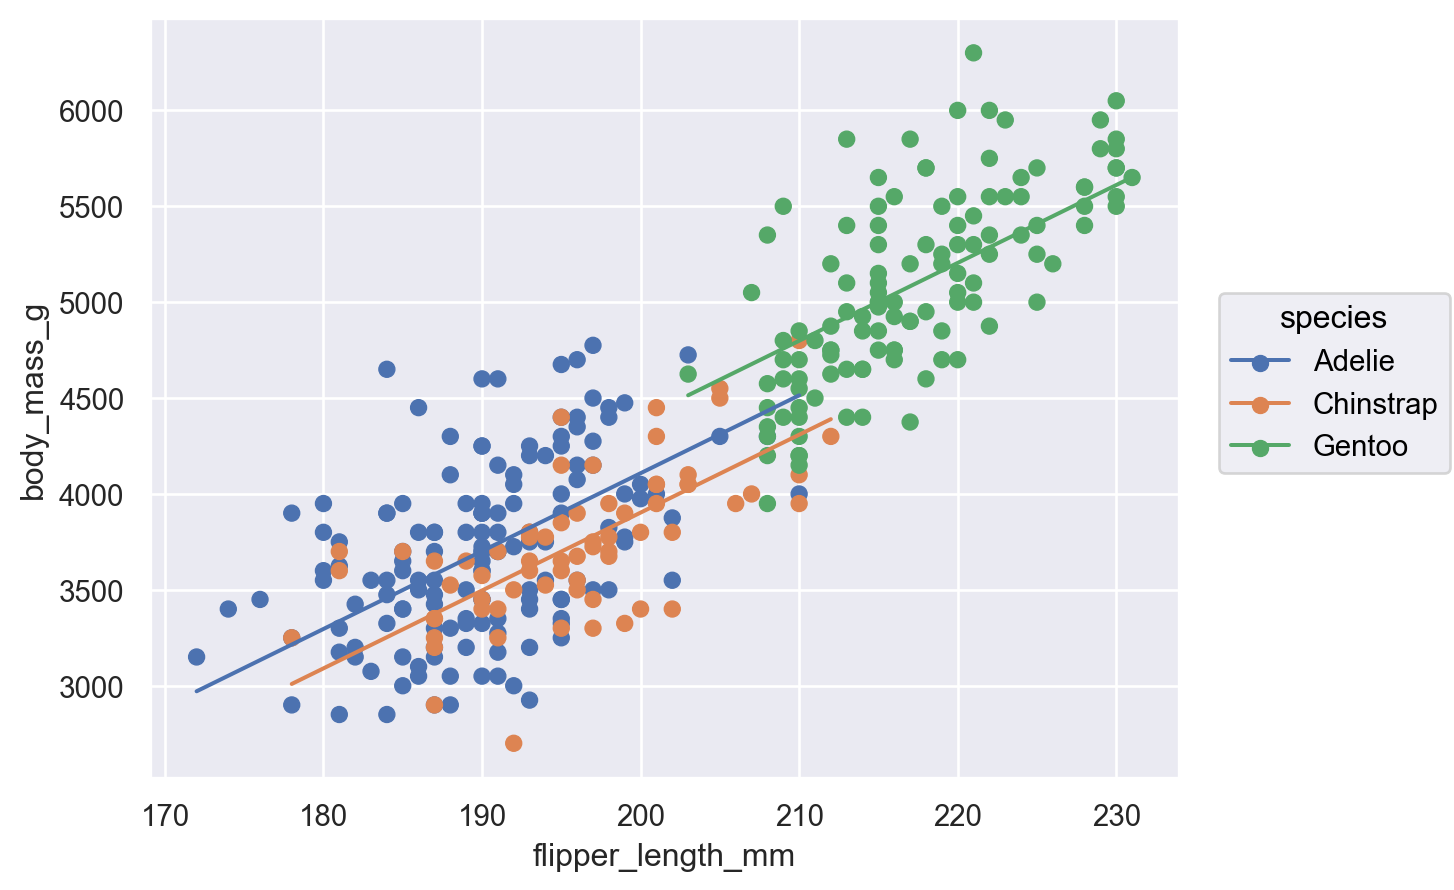

In [297]:
(
    so.Plot(data = penguins, x = "flipper_length_mm", y = "body_mass_g", color = "species")
    .add(so.Line(), y=y_pred, color = "species")  # Otro milagro!! No le tenía ninguna fe a esto :)
    .add(so.Dot())
)

## Nivel 1: Entrenemos cada modelo en todos los datos

In [298]:
inm = pd.read_csv("inmuebles.csv")

In [299]:
y1, X1 = Formula("precio ~ superficie * zona").get_model_matrix(inm)
y2, X2 = Formula("precio ~ superficie + zona").get_model_matrix(inm)
y3, X3 = Formula("precio ~ superficie : zona").get_model_matrix(inm)

In [300]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X1,y1)
print(modelo.coef_)
y1_pred = modelo.predict(X1).flatten()

[[ 58.85200024   2.44208139  21.87810901 -33.88551502   0.76419761
    2.11846288]]


In [301]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X2,y2)
print(modelo.coef_)
y2_pred = modelo.predict(X2).flatten()

r2 = r2_score(y2, y2_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y2, y2_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[ -3.43077907   3.53386388  53.90813726 134.50896043]]
R^2:  0.9580813979513345
Raiz cuadarada del ECM:  29.848178898483575


In [302]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X3,y3)
print(modelo.coef_)
y3_pred = modelo.predict(X3).flatten()

r2 = r2_score(y3, y3_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y3, y3_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[55.69922784  2.49226022  3.46562757  4.27934134]]
R^2:  0.9732554953611157
Raiz cuadarada del ECM:  23.841398274942655


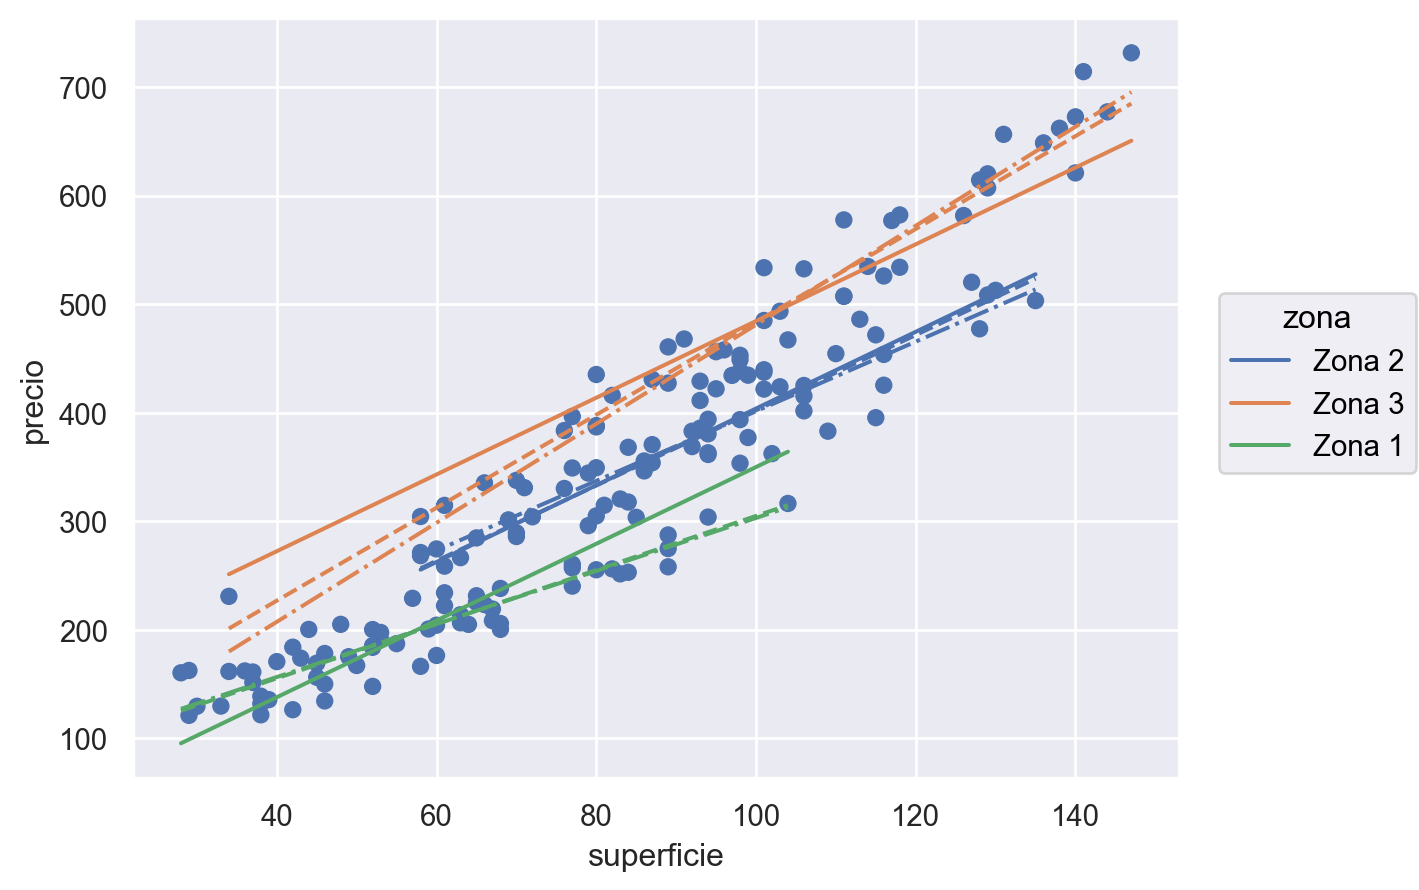

In [303]:
(
    so.Plot(inm, x = "superficie", y = "precio")
    .add(so.Dot())
    .add(so.Line(linestyle= '-.'), y = y1_pred, color = "zona")
    .add(so.Line(), y = y2_pred, color = "zona")
    .add(so.Line(linestyle='--'), y = y3_pred, color = "zona")
)

## Nivel 2: Separar en entrenamiento y testeo


In [304]:
train_ind = np.full(len(inm), False)
train_ind[0:int(0.8*len(inm))] = True
np.random.shuffle(train_ind)

X1_train, X1_test = X1[train_ind], X1[train_ind == False]
X2_train, X2_test = X2[train_ind], X2[train_ind == False]
X3_train, X3_test = X3[train_ind], X3[train_ind == False]
y_train, y_test = y1[train_ind], y1[train_ind == False]

In [305]:
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, y_train, y_test = train_test_split(X1, X2, X3, y1, test_size=0.2, random_state=42)

In [306]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X1_train,y_train)
print(modelo.coef_)
y1_pred = modelo.predict(X1_test).flatten()

r2 = r2_score(y_test, y1_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y1_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[ 55.65067856   2.47434362  33.31163666 -16.06956358   0.62902764
    1.95477784]]
R^2:  0.9532442300210664
Raiz cuadarada del ECM:  31.144147767081954


In [307]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X2_train,y_train)
print(modelo.coef_)
y2_pred = modelo.predict(X2_test).flatten()

r2 = r2_score(y_test, y2_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y2_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[  0.45744506   3.42262062  58.99984427 147.5010829 ]]
R^2:  0.9228218904752272
Raiz cuadarada del ECM:  40.01344211735404


In [308]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X3_train,y_train)
print(modelo.coef_)
y3_pred = modelo.predict(X3_test).flatten()

r2 = r2_score(y_test, y3_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y3_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[60.86860436  2.39212562  3.39415577  4.24269284]]
R^2:  0.9518375405882162
Raiz cuadarada del ECM:  31.609175851252704


Pareceria ser mejor modelo el numero 1, desde el punto de vista de RECM y R2. Vamos a usar k-cross Validation para terminar de chequear que el modelo que mejor ajusta es el de superficie * zona

## Paso 3: entrenamiento, validacion y testeo

In [309]:
inm_train, inm_test = train_test_split(inm, test_size=0.2, random_state=42)

In [310]:
y1, X1 = Formula("precio ~ superficie * zona").get_model_matrix(inm_train)
y2, X2 = Formula("precio ~ superficie + zona").get_model_matrix(inm_train)
y3, X3 = Formula("precio ~ superficie : zona").get_model_matrix(inm_train)

In [311]:
X1_train, X1_val, X2_train, X2_val, X3_train, X3_val, y_train, y_val = train_test_split(X1, X2, X3, y1, test_size=0.2, random_state=42)

In [312]:
modelo1 = linear_model.LinearRegression(fit_intercept = False)
modelo1.fit(X1_train,y_train)
print(modelo1.coef_)
y1_pred = modelo1.predict(X1_val).flatten()

r2 = r2_score(y_val, y1_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_val, y1_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[ 61.47004422   2.37219811  21.99731508 -13.93852251   0.79995015
    1.97688798]]
R^2:  0.9758137824673337
Raiz cuadarada del ECM:  21.68452506843805


In [313]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X2_train,y_train)
print(modelo.coef_)
y2_pred = modelo.predict(X2_val).flatten()

r2 = r2_score(y_val, y2_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_val, y2_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[ -1.15292945   3.46509469  57.55340212 144.2616023 ]]
R^2:  0.9605078276621806
Raiz cuadarada del ECM:  27.70903805988859


In [314]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X3_train,y_train)
print(modelo.coef_)
y3_pred = modelo.predict(X3_val).flatten()

r2 = r2_score(y_val, y3_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_val, y3_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[64.67904074  2.32062809  3.3660677   4.20058681]]
R^2:  0.9735069241771614
Raiz cuadarada del ECM:  22.69510146018024


Me quedo con el modelo 1 que es el de menor RECM y mejor R2. Entreno en todos los datos y testeo

In [315]:
y1_test, X1_test = Formula("precio ~ superficie * zona").get_model_matrix(inm_test)

In [316]:
modelo1.fit(X1,y1)

y_pred = modelo1.predict(X1_test)

r2 = r2_score(y1_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y1_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9532442300210664
Raiz cuadarada del ECM:  31.144147767081954


## Nivel 4: separamos en entrenamiento y testeo, y hacemos validación cruzada en el conjunto de entrenamiento.

In [317]:
inm_train, inm_test = train_test_split(inm, test_size=0.2, random_state=2)

In [318]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

In [319]:
y1, X1 = Formula("precio ~ superficie * zona").get_model_matrix(inm_train)
y2, X2 = Formula("precio ~ superficie + zona").get_model_matrix(inm_train)
y3, X3 = Formula("precio ~ superficie : zona").get_model_matrix(inm_train)

In [320]:
modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X1):
    X1_train, X1_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelo1.fit(X1_train, y_train)
    
    y_pred = modelo1.predict(X1_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean())

23.63538606372268


In [321]:
modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X2):
    X2_train, X2_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelo1.fit(X2_train, y_train)
    
    y_pred = modelo1.predict(X2_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean())

29.27641952121502


In [322]:
modelo1 = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego

ind = 0

# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, val_index in cv.split(X3):
    X3_train, X3_val, y_train, y_val = X3.iloc[train_index], X3.iloc[val_index], y1.iloc[train_index], y1.iloc[val_index]
    modelo1.fit(X3_train, y_train)
    
    y_pred = modelo1.predict(X3_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean())

23.421773152488345


In [323]:
y1_test, X1_test = Formula("precio ~ superficie * zona").get_model_matrix(inm_test)

In [324]:
modelo1.fit(X1,y1)

y_pred = modelo1.predict(X1_test)

r2 = r2_score(y1_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y1_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9645134011104939
Raiz cuadarada del ECM:  26.033575612277975


In [325]:
y3_test, X3_test = Formula("precio ~ superficie : zona").get_model_matrix(inm_test)

In [326]:
modelo1.fit(X3,y3)

y_pred = modelo1.predict(X3_test)

r2 = r2_score(y3_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y3_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9608178386378907
Raiz cuadarada del ECM:  27.35557365408582


 Ambos modelos aproximan muy bien a los datos, y hay poca diferencia entre ellos. Tanto en R2 como en RECM, por lo tanto podemos usar cualquiera de los dos


In [389]:
credit = pd.read_csv("credit.csv")
credit

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


In [390]:
columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
credit[columns] /= credit[columns].max()

In [391]:
credit_train, credit_test = train_test_split(credit, test_size=0.2, random_state=42)


In [392]:
y, X1 = Formula("Balance ~ Income + Limit + Age + Education + Cards * Gender + Rating").get_model_matrix(credit_train)
y, X2 = Formula("Balance ~ Income + Education + Limit + Cards + Age + Rating").get_model_matrix(credit_train)

In [393]:
alphas = np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1])

In [394]:
for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego 

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X1):
        X1_train, X1_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X1_train, y_train)

        y_pred = modeloRidge.predict(X1_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")

Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 157.30850
Para alpha = 0.00500 la raíz del Error Cuadratico Medio es: 157.28654
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 157.27085
Para alpha = 0.02000 la raíz del Error Cuadratico Medio es: 157.25758
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 157.50967
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 163.86332
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 176.09314


In [395]:
# Ampliemos en alphas cercanos a 0.02
alphas = np.array([0.001, 0.01, 0.015, 0.018, 0.02, 0.023, 0.025, 0.1, 0.5, 1])
for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego 

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X1):
        X1_train, X1_val, y_train, y_val = X1.iloc[train_index], X1.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X1_train, y_train)

        y_pred = modeloRidge.predict(X1_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")

Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 157.30850
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 157.27085
Para alpha = 0.01500 la raíz del Error Cuadratico Medio es: 157.26202
Para alpha = 0.01800 la raíz del Error Cuadratico Medio es: 157.25891
Para alpha = 0.02000 la raíz del Error Cuadratico Medio es: 157.25758
Para alpha = 0.02300 la raíz del Error Cuadratico Medio es: 157.25656
Para alpha = 0.02500 la raíz del Error Cuadratico Medio es: 157.25648
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 157.50967
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 163.86332
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 176.09314


0.025 es el de minimo RERM

In [402]:
alphas = np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1])

In [403]:
for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego 

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X2):
        X2_train, X2_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X2_train, y_train)

        y_pred = modeloRidge.predict(X2_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")

Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 157.87868
Para alpha = 0.00500 la raíz del Error Cuadratico Medio es: 157.85510
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 157.84056
Para alpha = 0.02000 la raíz del Error Cuadratico Medio es: 157.83194
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 158.11547
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 164.57367
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 176.89164


In [404]:
# Ampliemos en alphas cercanos a 0.02
alphas = np.array([0.001, 0.01, 0.015, 0.018, 0.02, 0.023, 0.025, 0.1, 0.5, 1])
for alpha in alphas:
    # Inicializamos un modelo de Regresion Lineal sin intercept
    modeloRidge = linear_model.Ridge(alpha = alpha, fit_intercept = False)    
    rmse = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego 

    ind = 0

    # Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
    for train_index, val_index in cv.split(X2):
        X2_train, X2_val, y_train, y_val = X2.iloc[train_index], X2.iloc[val_index], y.iloc[train_index], y.iloc[val_index]
        modeloRidge.fit(X2_train, y_train)

        y_pred = modeloRidge.predict(X2_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind + 1

    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")

Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 157.87868
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 157.84056
Para alpha = 0.01500 la raíz del Error Cuadratico Medio es: 157.83393
Para alpha = 0.01800 la raíz del Error Cuadratico Medio es: 157.83228
Para alpha = 0.02000 la raíz del Error Cuadratico Medio es: 157.83194
Para alpha = 0.02300 la raíz del Error Cuadratico Medio es: 157.83240
Para alpha = 0.02500 la raíz del Error Cuadratico Medio es: 157.83330
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 158.11547
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 164.57367
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 176.89164


0.02 es el de minimo RECM

Veamos con los alphas fijos en cada modelo y entrenando en el set de datos completos cual obtiene mejores resultados en los datos de testeo

In [406]:
y_test, X1_test = Formula("Balance ~ Income + Limit + Age + Education + Cards * Gender + Rating").get_model_matrix(credit_test)
alpha_op1 = 0.025
modeloRidge = linear_model.Ridge(alpha = alpha_op1, fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modeloRidge.fit(X1, y)
y_pred = modeloRidge.predict(X1_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"El error para alpha: {alpha_op1:.3f} la raiz del ECM es: {rmse.mean():.5f}")


El error para alpha: 0.025 la raiz del ECM es: 170.35312


In [407]:
y_test, X2_test = Formula("Balance ~ Income + Education + Limit + Cards + Age + Rating").get_model_matrix(credit_test)
alpha_op2 = 0.02
modeloRidge = linear_model.Ridge(alpha = alpha_op2, fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modeloRidge.fit(X2, y)
y_pred = modeloRidge.predict(X2_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"El error para alpha: {alpha_op2:.2f} la raiz del ECM es: {rmse.mean():.5f}")


El error para alpha: 0.02 la raiz del ECM es: 172.63044


Se obtuvo mejor resultados para el modelo que tiene en cuenta a la variable gender, como Cards * Gender. Aunque ambos modelos mantienen un error parecido

APRENDER A SER MAS ORGANIZADO Y MECANICO. REVISAR CLASE 12 Y REHACER EL ULTIMO EJERCICIO CON ESO
